1. Import data from excel

In [11]:
%reset -f
import pandas as pd
import xlwings as xw

# Import currently selected data form excel
wb = xw.books.active
ws = wb.sheets.active
data = ws.range(wb.selection.address).value

# Make df from imported data
df = pd.DataFrame(data[2:], columns=data[0])  # Start reading data starting at row_idx=2 and use row_idx=1 as df headers
column_names = [df.columns[i] for i in [0, 1]]
df = df[column_names]
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

## Visualise / check imported data
df







,Classes\tSlew,speed
0,-34.164820,49.0
1,-31.808626,63.0
2,-29.452431,1312.0
3,-27.096237,557.0
4,-24.740042,110.0
5,-22.383848,130.0
6,-20.027653,151.0
7,-17.671459,1092.0
8,-15.315264,308.0
9,-12.959070,173.0


2. Plot Slew Speed Histogram 

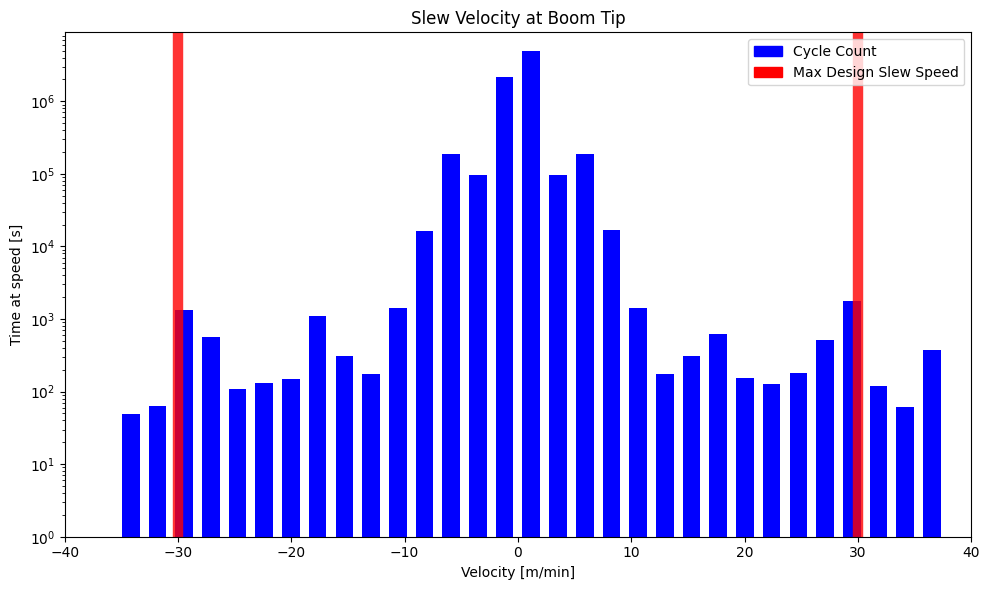

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# MAIN USER INPUTS
title = "Luff Velocity at Boom Tip"
max_slew = 30                      #Maximum slew speed 
min_slew = -30                     #Minimum slew speed 

# SECONDARY USER INPUTS
tick_start, tick_end = -40, 40     #Where do you want the x-axis to start and end?
num_ticks = 9                      #How many ticks do you want on the x-axis?

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(df.iloc[:, 0], df.iloc[:, 1], width=(df.iloc[-1, 0]-df.iloc[0, 0])/(len(df)-1)*0.66, color='#0000ff')

# Titles and labels
plt.title(title)
plt.xlabel('Velocity [m/min]')
plt.ylabel('Time at speed [s]')
plt.yscale('log')
plt.ylim(bottom=1)
plt.xlim(tick_start, tick_end)

# Evenly spaced integer ticks
tick_positions = np.round(np.linspace(tick_start, tick_end, num_ticks)).astype(int)
plt.xticks(tick_positions)

# Vertical lines (full y-axis)
plt.axvline(x=max_slew, color='#ff0000', linestyle='-', linewidth=7.5, alpha=0.8)
plt.axvline(x=min_slew, color='#ff0000', linestyle='-', linewidth=7.5, alpha=0.8)

# Legend
plt.legend(handles=[
    mpatches.Patch(color='#0000ff', label='Cycle Count'),
    mpatches.Patch(color='#ff0000', label='Max Design Luff Speed')])

plt.tight_layout()
plt.show()
